<a href="https://colab.research.google.com/github/Mohanskm/Sentiment/blob/main/(DL_PRAC_3)Image_classification_using_a_convolutional_neural_network_(CNN)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Create model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30
625/625 [==============================] - 56s 87ms/step - loss: 1.6312 - accuracy: 0.4044 - val_loss: 1.4574 - val_accuracy: 0.4758
Epoch 2/30
625/625 [==============================] - 48s 76ms/step - loss: 1.3044 - accuracy: 0.5331 - val_loss: 1.2071 - val_accuracy: 0.5741
Epoch 3/30
625/625 [==============================] - 47s 75ms/step - loss: 1.1632 - accuracy: 0.5890 - val_loss: 1.0958 - val_accuracy: 0.6169
Epoch 4/30
625/625 [==============================] - 46s 73ms/step - loss: 1.0518 - accuracy: 0.6310 - val_loss: 1.0701 - val_accuracy: 0.6173
Epoch 5/30
625/625 [==============================] - 47s 75ms/step - loss: 0.9788 - accuracy: 0.6566 - val_loss: 1.0063 - val_accuracy: 0.6467
Epoch 6/30
625/625 [==============================] - 48s 77ms/step - loss: 0.9104 - accuracy: 0.6813 - val_loss: 0.9497 - val_accuracy: 0.6680
Epoch 7/30
625/625 [==============================] - 47s 75ms/step - loss: 0.8576 - accuracy: 0.7001 - val_loss: 0.9236 - val_accuracy:

313/313 [==============================] - 4s 13ms/step - loss: 1.3946 - accuracy: 0.6844
Test accuracy: 0.6844000220298767


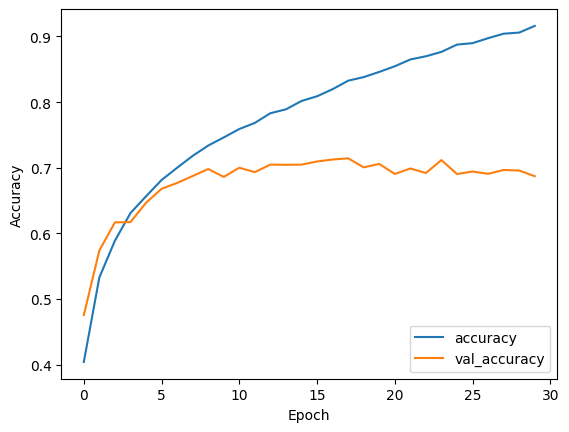

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 [==============================] - 4s 11ms/step


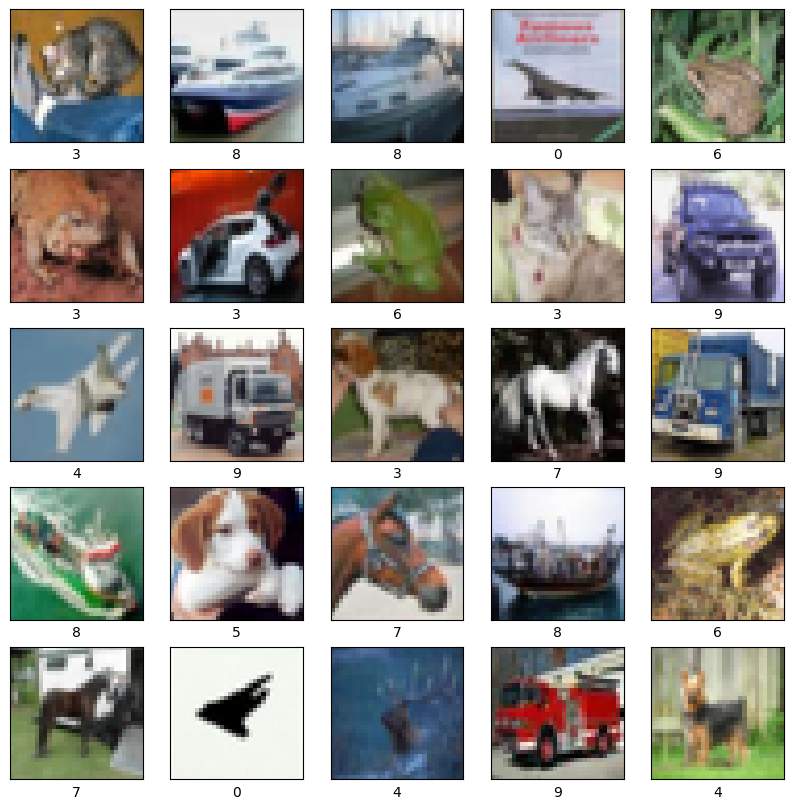

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Visualize sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
